# Mise à l’échelle des performances d’exécution de t-SNE et UMAP sur différentes tailles sous-échantillons de l’ensemble de données de mnist. La ligne t-SNE inférieure est le murtemps d’exécution d’horloge pour Multicore t-SNE utilisant 8 cœurs.

Chargement des outils numpy , pandas et des outils pour obtenir et rééchantillonner les données ainsi que le module de temps. 
Le jeu de données de chiffres MNIST est obtenu à partir de scikit-learn.

In [1]:

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.utils import resample
import time
import warnings
warnings.filterwarnings('ignore')


Chargement de t-SNE, MulticoreTSNE(version améliorée de t-SNE), t-SNE et UMAP à partir de scikit-learn

In [3]:
from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE
from umap import UMAP

Chargement des outils de traçage : matplotlib et seaborn de scikit-learn


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Pour les couleurs des figures

In [6]:
sns.set(context='notebook',
        rc={'figure.figsize':(12,10)},
        palette=sns.color_palette('tab10', 10))

Chargement du jeu de données minst

In [11]:
mnist = fetch_openml('Fashion-MNIST', version=1)

Sous-échantillonnage à partir de chiffres MNIST (via l’utilitaire pratique de scikit-learn) et en examinant le temps d’exécution pour des sous-échantillons de tailles variables.
Étant donné qu’il y a un certain caractère aléatoire impliqué ici (à la fois dans la sélection du sous-échantillon et dans certains des algorithmes qui ont des aspects stochastiques), nous voudrons exécuter quelques exemples pour chaque taille de jeu de données.
Nous pouvons facilement empaqueter tout cela dans une fonction simple qui renverra une trame de données pandas pratique de tailles de jeux de données et d’exécutions en fonction d’un algorithme.

In [12]:
def data_size_scaling(algorithm, data, sizes=[100, 200, 400, 800, 1600], n_runs=5):
    result = []
    for size in sizes:
        for run in range(n_runs):
            subsample = resample(data, n_samples=size)
            start_time = time.time()
            algorithm.fit(subsample)
            elapsed_time = time.time() - start_time
            del subsample
            result.append((size, elapsed_time))
    return pd.DataFrame(result, columns=('dataset size', 'runtime (s)'))

    

Maintenant, nous voulons simplement exécuter cela pour chacune des différentes implémentations de réduction de dimension (UMAP, MulticoreTSNE,t-SNE) afin que nous puissions examiner les résultats. Comme nous ne savons pas combien de temps ces séries pourraient prendre, nous allons commencer avec un très petit ensemble d’échantillons, jusqu’à seulement 1600 échantillons.

In [13]:
all_algorithms = [
    UMAP(),
    MulticoreTSNE(),
    TSNE(), 
]
performance_data = {}
for algorithm in all_algorithms:
    alg_name = str(algorithm)
    if 'MulticoreTSNE' in alg_name:
        alg_name = 'MulticoreTSNE'
    else:
        alg_name = alg_name.split('(')[0]

    performance_data[alg_name] = data_size_scaling(algorithm, mnist.data, n_runs=3)

Pour chacune des méthodes nous aurons la performance pour chaque échantillon
Maintenant, traçons les résultats afin que nous puissions voir ce qui se passe. 

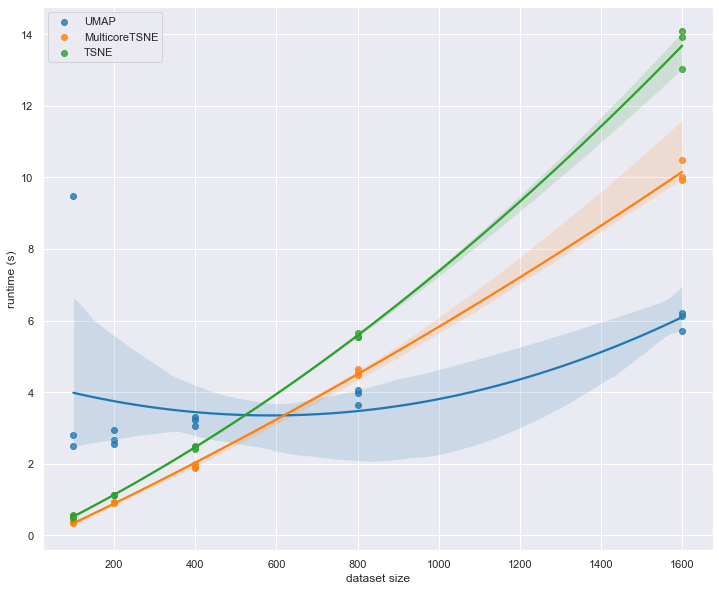

In [14]:
for alg_name, perf_data in performance_data.items():
    sns.regplot('dataset size', 'runtime (s)', perf_data, order=2, label=alg_name)
plt.legend();

Au fur et à mesure que la taille des données augmente plus le coût de calcul de t-SNE, FIt-SNE augmente considérablement, tandis que UMAP continue de  bien fonctionner dans les dizaines de milliers de dimensions.
Il est important de signaler qu'avec des données de taille respectivement inférieure à 500 et un peu plus de 600, t-SNE et FIt-SNE sont meilleures que UMAP, biensûr en temps de calcul.
Il est donc préferable d'utiliser UMAP pour les données de grandes tailles c'est à dire celles qui sont supérieures à 500 et d'utiliser la t-SNE pour les échantillons de tailles inférieures à 500.